Different types of noises can affect images, and specific smoothing or sharpening techniques are better suited to handle each.

| **Type of Noise**         | **Description**                                           | **Best Smoothing Technique**                                           |
|----------------------------|-----------------------------------------------------------|-----------------------------------------------------------------------------------|
| **Gaussian Noise**         | Random variations following a normal distribution         | Gaussian Blur or Bilateral Filter                                   |
| **Salt-and-Pepper Noise**  | Random white (salt) and black (pepper) pixels             |  Median Filter                                                       |
| **Poisson Noise**          | Signal-dependent noise from photon counting (low-light)   | Gaussian Blur or Non-Local Means                                    |
| **Uniform Noise**          | Pixels uniformly distributed with random intensity        | Mean Filter (Averaging)                                             |

Few other types of noise include:
- Gamma (Erlang Noise)
- Periodic Noise
- Rayleigh Noise

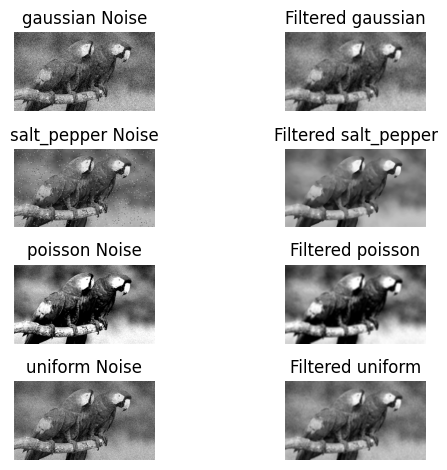

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, std=25):
    gaussian = np.random.normal(mean, std, image.shape).astype(np.float32)
    noisy_image = cv2.add(image.astype(np.float32), gaussian)
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Function to add Salt-and-Pepper noise
def add_salt_and_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    noisy_image = image.copy()
    total_pixels = image.size
    num_salt = int(total_pixels * salt_prob)
    num_pepper = int(total_pixels * pepper_prob)

    # Add salt
    coords_salt = [np.random.randint(0, i - 1, num_salt) for i in image.shape[:2]]
    noisy_image[coords_salt[0], coords_salt[1]] = 255


    # Add pepper
    coords_pepper = [np.random.randint(0, i - 1, num_pepper) for i in image.shape[:2]]
    noisy_image[coords_pepper[0], coords_pepper[1]] = 0


    return noisy_image

# Function to add Poisson noise
def add_poisson_noise(image):
    noise = np.random.poisson(image / 255.0 * 255).astype(np.float32)
    noisy_image = image + noise - np.mean(noise)
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Function to add Uniform noise
def add_uniform_noise(image, low=-25, high=25):
    uniform = np.random.uniform(low, high, image.shape).astype(np.float32)
    noisy_image = cv2.add(image.astype(np.float32), uniform)
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Function to apply smoothing filter
def apply_smoothing_filter(noisy_image, filter_type='gaussian'):
    if filter_type == 'gaussian':
        return cv2.GaussianBlur(noisy_image, (5, 5), 1.5)
    elif filter_type == 'median':
        return cv2.medianBlur(noisy_image, 5)
    elif filter_type == 'mean':
        return cv2.blur(noisy_image, (5, 5))
    else:
        raise ValueError("Unknown filter type: Choose 'gaussian', 'median', or 'mean'")

# Read and preprocess image
image = cv2.imread('parrot.jpg', cv2.IMREAD_GRAYSCALE)

# Add noise and smooth it
noise_types = ['gaussian', 'salt_pepper', 'poisson', 'uniform']
noisy_and_filtered = []

for noise_type in noise_types:
    if noise_type == 'gaussian':
        noisy = add_gaussian_noise(image)
        filtered = apply_smoothing_filter(noisy, 'gaussian')
    elif noise_type == 'salt_pepper':
        noisy = add_salt_and_pepper_noise(image)
        filtered = apply_smoothing_filter(noisy, 'median')
    elif noise_type == 'poisson':
        noisy = add_poisson_noise(image)
        filtered = apply_smoothing_filter(noisy, 'mean')
    elif noise_type == 'uniform':
        noisy = add_uniform_noise(image)
        filtered = apply_smoothing_filter(noisy, 'gaussian')

    noisy_and_filtered.append((noisy, filtered))

# Display results
for i, (noisy, filtered) in enumerate(noisy_and_filtered):
    plt.subplot(4, 2, 2*i+1)
    plt.title(f'{noise_types[i]} Noise')
    plt.imshow(noisy, cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, 2*i+2)
    plt.title(f'Filtered {noise_types[i]}')
    plt.imshow(filtered, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()
